In [1]:
# Import the four horsemen of data science packages
import pandas as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import models,layers

In [2]:
tf.__version__

'2.2.0'

In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [4]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### RESHAPE

In [5]:
# Preparing train and testing data
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000,28, 28, 1))

In [6]:
# Information about dataset
PIXELS = len(train_images[0])

print("Number of pixels:", PIXELS)
print('')
print("Number of train_images:", len(train_images))
print("Number of train_labels:", len(train_labels))
print('')
print("Number of test_images:", len(test_images))
print("Number of test_labels:", len(test_labels))

Number of pixels: 28

Number of train_images: 60000
Number of train_labels: 60000

Number of test_images: 10000
Number of test_labels: 10000


In [7]:
train_images[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [8]:
train_images,test_images = train_images / 255 , test_images / 255 

# Build model

In [9]:
model = models.Sequential() 
#vGG 1 
model.add(layers.Conv2D(32,(3,3),activation = "relu",input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
          

### MLP

In [10]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation = "relu"))
model.add(layers.Dense(10,activation = "softmax"))

### COMPILE MODEL


In [11]:
model.compile(optimizer = "adam",loss = "sparse_categorical_crossentropy", metrics = ['accuracy'])
history = model.fit(train_images , train_labels , epochs = 15 , validation_data = (test_images,test_labels),batch_size = 64) 

Epoch 1/15
938/938 [==============================] - 15s 16ms/step - loss: 0.2091 - accuracy: 0.9394 - val_loss: 0.0765 - val_accuracy: 0.9770
Epoch 2/15
938/938 [==============================] - 16s 17ms/step - loss: 0.0699 - accuracy: 0.9793 - val_loss: 0.0561 - val_accuracy: 0.9824
Epoch 3/15
938/938 [==============================] - 17s 18ms/step - loss: 0.0491 - accuracy: 0.9852 - val_loss: 0.0501 - val_accuracy: 0.9833
Epoch 4/15
938/938 [==============================] - 18s 19ms/step - loss: 0.0377 - accuracy: 0.9885 - val_loss: 0.0484 - val_accuracy: 0.9854
Epoch 5/15
938/938 [==============================] - 19s 20ms/step - loss: 0.0282 - accuracy: 0.9908 - val_loss: 0.0458 - val_accuracy: 0.9866
Epoch 6/15
938/938 [==============================] - 19s 21ms/step - loss: 0.0222 - accuracy: 0.9929 - val_loss: 0.0517 - val_accuracy: 0.9853
Epoch 7/15
938/938 [==============================] - 17s 19ms/step - loss: 0.0169 - accuracy: 0.9949 - val_loss: 0.0521 - val_accuracy:

313/313 - 1s - loss: 0.0683 - accuracy: 0.9839


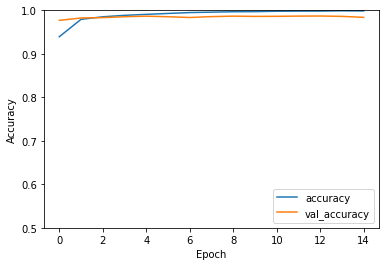

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [13]:
model.save('model.h5')